# Re-Expression

When data is skewed, it can be hard to summarize them, and hard to decide whether the most extreme values are outliers or just part of the stretched-out tail. How can we say anything useful about such data? The secret is to re-express the data by applying a simple function to each value. ;)

Many relationships and “laws” in the sciences and social sciences include functions such as logarithms, square roots, and reciprocals. Similar relationships often show up in data. 

Here’s a simple example:

In 1980 CEOs made, on average, about 42 times what workers earned. In the next two decades, CEO compensation soared when compared to the average worker. By 2000 that multiple had jumped to 525 🤯😱😵. What does the distribution of the compensation of Fortune 500 companies’ CEOs look like? Here’s a histogram and boxplot for 2005 compensation:

![CEO Salary Distribution](https://raw.githubusercontent.com/SSpindt/AI/main/Semester%201/Problem%20Set%20Images/CEOSalary.png)

We have 500 CEOs and about 48 possible histogram bins, most of which are empty. Don’t miss the tiny bars straggling out to the right! The boxplot indicates that some CEOs received extraordinarily high compensations, while the majority received relatively “little.” But look at the values of the bins. The first bin, with about half the CEOs, covers incomes from 0 dollars to 5 million dollars 🤯😱😵. 

The reason that the histogram seems to leave so much of the area blank is that the salaries are spread all along the axis from about fifteen million to 240 million dollars. After 50 million dollars there are so few for each bin that it’s very hard to see the tiny bars. What we can see from this histogram and boxplot is that this distribution is highly skewed to the right!

It can be hard to decide what we mean by the “center” of a skewed distribution, so it’s hard to pick a typical value to summarize the distribution. What would you say was a typical CEO salary? The mean value is 10,307,000, while the median is “only” 4,700,000. Each tells us something different about the data.

One thing we can do is to **re-express** or **transform** the data in some way. More specifically, we can apply a simple function to make the the skewed distribution more symmetric. For example, we could take the square root or logarithm of each salary. Taking logs works pretty well, as you can see:

![CEO Salary Distribution Rexpressed](https://raw.githubusercontent.com/SSpindt/AI/main/Semester%201/Problem%20Set%20Images/Re-expressedCeoSalary.png)

The histogram of the logs of the salaries is now much more symmetric! We can see that a typical log compensation is between 6 -- which corresponds to 1,000,000 dollars -- and 7 -- corresponding to 10,000,000 dollars. And it’s easier to talk about a typical value for the logs. The mean log compensation is 6.73, while the median is 6.67. (That’s 5,370,317 dollars and 4,677,351 dollars, respectively.) Notice that nearly all the values are between 6.0 and 8.0. In other words, between 1,000,000 dollars and 100,000,000 dollars a year, but who’s counting 😛?

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and the [2024 Spotify data set](https://drive.google.com/drive/folders/1qJlOhn_pZ8dMnV6onOt8l0bG5756Fh9d?usp=sharing) we saw a few classes ago.

## <span style="color:blue">Problem 1</span>
First, examine the distribution of YouTube Views. Then, answer these questions:
1. What part of this distribution makes it difficult to summarize?
2. What would you suggest we do if we want to understand YouTube Views better?

[Text(0.5, 1.0, 'Histogram of YouTube Views'),
 Text(0.5, 0, 'Views'),
 Text(0, 0.5, 'Frequency')]

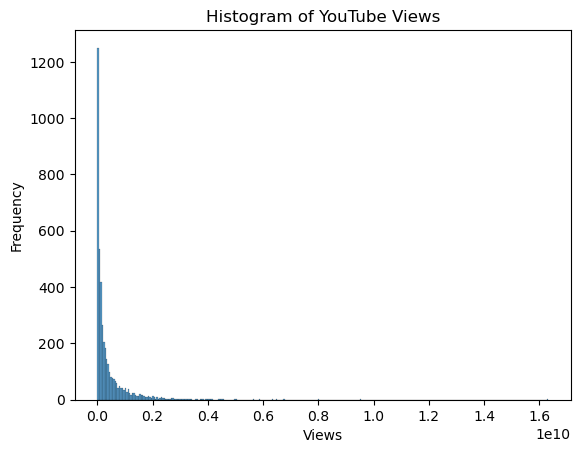

In [1]:
# Visualize the distribution with Python here.
import pandas as pd
import seaborn as sns
df = pd.read_csv("spotify2024.csv", encoding = "ISO-8859-1")
df["YouTube Views"] = df["YouTube Views"].str.replace(",", "")
df["YouTube Views"] = pd.to_numeric(df["YouTube Views"], errors= "coerce")
sns.histplot(df['YouTube Views'], kde=False).set(title='Histogram of YouTube Views', xlabel='Views', ylabel='Frequency')

1. the wide range of YouTube view makes it difficult to summerize
2. rewrite the outlies

## <span style="color:blue">Problem 2</span>
Re-express the YouTube Views distribution so that it is easier to summarize.
Hint! Consider using one of these re-expression techniques:
1. Logarithmic Transformation
2. Square Root Transformation
3. Reciprocal Transformation

[Text(0.5, 1.0, 'Log-Transformed Histogram of YouTube Views'),
 Text(0.5, 0, 'Log10(Views)'),
 Text(0, 0.5, 'Frequency')]

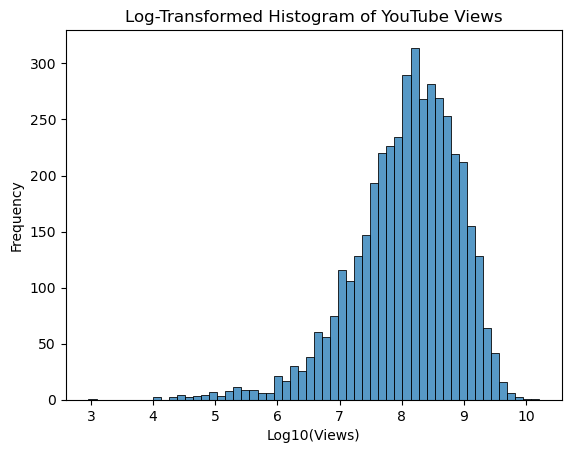

In [2]:
import numpy as np # Numpy is a Python library that does calculations quickly and efficiently.

# Re-express the distribution with Python here.
df['Log YouTube Views'] = np.log10(df['YouTube Views'] + 1)
sns.histplot(df['Log YouTube Views'], kde=False).set(
    title='Log-Transformed Histogram of YouTube Views',
    xlabel='Log10(Views)',
    ylabel='Frequency'
)

## <span style="color:blue">Problem 3</span>
Take a look at your re-expression. Then, answer the following questions:
1. Is it better to analyze the original YouTube Views or the re-expressed version of the data? Why?
2. Write a few sentences that describes the YouTube Views distribution. What can we conclude from this distribution?

1. the re expressed version is way easier to understand, because its more straight forward.
2. there higher frequency between 7-9 logviews

# Z-Scores
The women’s heptathlon in the Olympics consists of seven track and field events: 
1. the 200-m run
2. 800-m run
3. 100-m high hurdles
4. shot put
5. javelin
6. high jump
7. long jump. 

To determine who should get the gold medal, somehow the performances in all seven events have to be combined into one score. How can performances in such different events be compared? They don’t even have the same units; the races are recorded in minutes and seconds and the throwing and jumping events in meters. In the 2004 Olympics, Austra Skujyté of Lithuania put the shot 16.4 meters, about 3 meters farther than the average of all contestants. Carolina Klüft won the long jump with a 6.78-m jump, about a meter better than the average. Which performance deserves more points? Even though both events are measured in meters, it’s not clear how to compare them. The solution to the problem of how to compare scores turns out to be a useful method for comparing all sorts of values whether they have the same units or not.

The trick in comparing very different-looking values is to use standard deviations. The standard deviation tells us how the whole collection of values varies, so it’s a natural ruler for comparing an individual value to the group.

Take a look at the means and standard deviations calculated for the long jump and shot put events of the 2004 Olympics:
![Olympic Calculations](https://raw.githubusercontent.com/SSpindt/AI/main/Semester%201/Problem%20Set%20Images/OlympicCalculations.png)

Klüft’s 6.78 m long jump is 0.62 meters longer than the mean jump of 6.16 m. How many standard deviations better than the mean is that? The standard deviation for this event was 0.23 m, so her jump was (6.78 - 6.16)\\0.23 = 0.62\\0.23 = 2.70 standard deviations better than the mean. Skujyté’s winning shot put was 16.40 - 13.29 = 3.11 meters longer than the mean shot put distance, and that’s 3.11\\1.24 = 2.51 standard deviations better than the mean. That’s a great performance but not quite as impressive as Klüft’s long jump, which was farther above the mean, as measured in standard deviations.

To compare these athletes’ performances, we determined how many standard deviations from the event’s mean each was. Expressing the distance in standard deviations standardizes the performances. To standardize a value, we simply subtract the mean performance in that event and then divide this difference by the standard deviation. We can write the calculation as:

![Z-Score Formula](https://raw.githubusercontent.com/SSpindt/AI/main/Semester%201/Problem%20Set%20Images/ZScoreFormula.png)

These values are called "standardized values", and are commonly denoted with the letter z. Usually, we just call them **z-scores**. Standardized values have no units. z-scores measure the distance of each data value from the mean in standard deviations. A z-score of 2 tells us that a data value is 2 standard deviations above the mean. It doesn’t matter whether the original variable was measured in inches, dollars, or seconds. Data values below the mean have negative z-scores, so a z-score of -1.6 means that the data value was 1.6 standard deviations below the mean. Of course, regardless of the direction, the farther a data value is from the mean, the more unusual it is, so a z-score of -1.3 is more extraordinary than a z-score of 1.2. 

Looking at the z-scores, we can see that even though both were winning scores, Klüft’s long jump with a z-score of 2.70 is slightly more impressive than Skujyté’s shot put with a z-score of 2.51 👏👏👏.

To summarize, a z-score gives us an indication of how unusual a value is because it tells us how far it is from the mean. If the data value sits right at the mean, it’s not very far at all and its z-score is 0. A z-score of 1 tells us that the data value is 1 standard deviation above the mean, while a z-score of -1 tells us that the value is 1 standard deviation below the mean. How far from 0 does a z-score have to be to be interesting or unusual? There is no universal standard, but the larger the score is (negative or positive), the more unusual it is. We know that 50% of the data lie between the quartiles. For symmetric data, the standard deviation is usually a bit smaller than the IQR, and it’s not uncommon for at least half of the data to have z-scores between - 1 and 1. But no matter what the shape of the distribution, a z-score of 3 (plus or minus) or more is rare, and a z-score of 6 or 7 deserves a second look.

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and the [2024 Spotify data set](https://drive.google.com/drive/folders/1qJlOhn_pZ8dMnV6onOt8l0bG5756Fh9d?usp=sharing) we saw a few classes ago.

## <span style="color:blue">Problem 4</span>

First, examine the distribution of TikTok Likes. Then, answer these questions:

1. What is the average number of likes received on TikTok?
2. What is the standard deviation of TikTok Likes? Remember, standard deviation should only be calculated for normal distrbutions.

In [10]:
def avg(column):
    sum = 0
    count = 0
    for value in column:
        try:
            sum += int(value)
            count += 1
        except (ValueError, TypeError):
            pass
    avg = sum / count if count > 0 else 0
    return avg

avg(df["TikTok Likes"])

112637464.57127072

In [11]:
std_dev = df["TikTok Likes"].astype(float).std()

print("Standard Deviation:", std_dev)

Standard Deviation: 549812332.3406577


1. the average TikTok likes are 112 million
2. the standard deviation of likes is 549 millions

## <span style="color:blue">Problem 5</span>

Calculate the Z-score for the number of TikTok likes that *Metro Boomin's Niagara Falls (Foot or 2)* received. Now, calculate the Z-score that *Kevin MacLeod's Monkeys Spinning Monkeys* received. Finally, answer the following question:
1. Which song received the more impressive amount of likes on TikTok?

In [7]:
row = df[df["Artist"] == "Metro Boomin"]
df["TikTok Likes"] = df["TikTok Likes"].str.replace(",", "")
df["TikTok Likes"] = pd.to_numeric(df["TikTok Likes"], errors= "coerce")
mb_zscore = (3 - df["TikTok Likes"].mean()) / df["TikTok Likes"].std()
mb_zscore

-0.2048652875641243

Metros score is -0.2. this means that Metro Boomin's number of likes is acually not that impressive because its more average

# Shifting and Rescaling
You can **shift** the data in a distribution when you add or subtract a constant from every value in the distribution. Adding or subtracting a constant changes each data value equally, so the entire distribution just shifts. Its shape doesn’t change and neither does the spread. None of the measures of spread we’ve discussed—not the range, not the IQR, not the standard deviation—changes.

You can **rescale** the data in a distribution when you multiple or divide every value in the distribution by a constant. Suppose we want to look at the weights of male individuals in pounds instead of kilograms. We’d have to rescale the data to do this. Because there are about 2.2 pounds in every kilogram, we’d convert the weights by multiplying each value by 2.2. Multiplying or dividing each value by a constant changes the measurement units. Here are histograms of the two weight distributions, plotted on the same scale, so you can see the effect of multiplying:

![Rescaling Data - Histograms](https://raw.githubusercontent.com/SSpindt/AI/main/Semester%201/Problem%20Set%20Images/RescalingData.png)

What happens to the shape of the distribution? Although the histograms don’t look exactly alike, we see that the shape really hasn’t changed: Both are uni- modal and skewed to the right.
What happens to the mean? Not much -- it gets multiplied by 2.2 as well. The men weigh 82.36 kg on average, which is 181.19 pounds. As the box-plots and 5-number summaries show, all measures of position act the same way. They all get multiplied by this same constant. What happens to the spread? Take a look at the boxplots. The spread in pounds (on the right) is larger. How much larger? If you guessed 2.2 times, you’ve figured out how measures of spread get rescaled.


![Rescaling Data - Box Plot](https://raw.githubusercontent.com/SSpindt/AI/main/Semester%201/Problem%20Set%20Images/BoxPlotRescale.png)

What does this mean for z-scores? When we standardize data into z-scores we are just shifting them by the mean and rescaling them by the standard deviation. Now we can see how standardizing affects the distribution! When we subtract the mean of the data from every data value, we shift the mean to zero. As we have seen, such a shift doesn’t change the standard deviation.
When we divide each of these shifted values by s, however, the standard deviation should be divided by s as well. Since the standard deviation was s to start with, the new standard deviation becomes 1.
How, then, does standardizing affect the distribution of a variable? Let’s consider the three aspects of a distribution: the shape, center, and spread.
- Standardizing into z-scores does not change the shape of the distribution of a variable. 
- Standardizing into z-scores changes the center by making the mean 0.
- Standardizing into z-scores changes the spread by making the standard deviation 1.

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and the latest [Spotify data set](https://drive.google.com/drive/folders/1nGqifcJXrpsEDCkAiJMnQkrGiOgD93Qv?usp=drive_link) we have been working with in the last few classes. <span style="color:red">**ALERT! This is a different data set!**</span>

## <span style="color:blue">Problem 6</span>
The length of songs is given in miliseconds. Convert the values to seconds. Then, examine the resulting distribution. Finally, answer these questions:

1. When you converted the values to seconds, did you perform a re-expression, shift, or rescaling of the duration_ms distribution?
2. What is the average length for a song to be? Write your answer in seconds.

In [7]:
# Your code here.

**Your markdown here.**

# Is it Normal?
Remember, you should only calculate the standard deviation of a normal distributions (roughly symmetric and unimodal, looks like a bell). Yes, you can draw the histogram to visually confirm if it is "normal enough", but is there a better way to tell?

There’s a more specialized graph that can help you to decide whether a distribution is normal -- it's called the **Normality Probability Plot**. If the distribution is "normal enough", the Normality Probility Plot will show a straight, diagonal line. This graph is usually able to show deviations from normal more clearly than the corresponding histogram, but it’s usually easier to understand how a distribution fails to be normal by looking at its histogram. So the Normality Probability Plot is just another tool in your toolbox that you can use to make a decision when the answer is debateable (and it often is!). 

Let's take a look at an example about car fuel efficienty to understand this better. 

![Normality Probability Plot - Gas](https://raw.githubusercontent.com/SSpindt/AI/main/Semester%201/Problem%20Set%20Images/NormalityProbPlot1.png)

The overall pattern of the Normal probability plot is straight. The two trailing low values correspond to the values in the histogram that trail off the low end. They’re not quite in line with the rest of the data set. The Normal probability plot shows us that they’re a bit lower than we’d expect of the lowest two values in a truly normal distribution.

In contrast, the Normal probability plot of the men’s Weights from the previous section is far from straight. The weights are skewed to the high end, and the plot is curved. We’d conclude from these pictures that approximations using the Empircal Rule (68–95–99.7 Rule) for these data would not be very accurate because the Empircal Rule only applies to normal distributions.

![Normality Probability Plot - Weight](https://raw.githubusercontent.com/SSpindt/AI/main/Semester%201/Problem%20Set%20Images/NormalityProbPlot2.png)

Why does the Normal probability plot work like that? Imagine you looked at 100 fuel efficiency measures for the Ms. Spindt's Honda. The smallest of these has a z-score of -3.16. A normal distribution can tell us what value to expect for the smallest z-score in a batch of 100 if it were normal. That turns out to be -2.58. So our first data value is smaller than we would expect from the "normal" value.

We can continue this and ask a similar question for each value. For example, the 14th-smallest fuel efficiency has a z-score of almost exactly -1, and that’s just what we should expect (well, -1.1 to be exact). A Normal probability plot takes each data value and plots it against the z-score you’d expect that point to have if the distribution were perfectly Normal.

When the values match up well, the line is straight. If one or two points are surprising from the Normal’s point of view, they don’t line up. When the entire distribution is skewed or different from normal in some other way, the values don’t match up very well at all and the plot bends.

It turns out to be tricky to find the values we expect. They’re called "Normal scores", but you can’t easily look them up. That’s why probability plots are best made with technology and not by hand.

The best advice on using Normal probability plots is to see whether they are straight. If so, then your data look like data from a Normal model. If not, make a histogram to understand how they differ from normal.

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and the latest [Spotify data set](https://drive.google.com/drive/folders/1nGqifcJXrpsEDCkAiJMnQkrGiOgD93Qv?usp=drive_link) we have been working with in the last few classes. It is the same data set used in the last problem.

## <span style="color:blue">Problem 7</span>
Examine the distribution for a track popularity. Create a Normality Probability Plot to see how "normal" it is. You need another Python library to do this -- it's called [SciPy](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html). I don't expect you to understand this code but I would like you to be able to interpret the plot. Finally, answer these questions:

1. Is track popularity normal? Justify your answer.
2. Which genre of music produces the most popular songs? Justify your answer.

In [ ]:
# Create distribution here

In [ ]:
# Normality Probability Plot Code
from scipy import stats
import matplotlib.pyplot as plt
(osm, osr), (slope, intercept, r) = stats.probplot(df["track_popularity"])
plt.figure(figsize=(10, 6))
plt.plot(osm, osr, 'o', markersize=5)
plt.plot(osm, slope * osm + intercept, 'r', linewidth=2)
plt.title('Normality Probability Plot - Track Popularity')
plt.xlabel('Normal Scores')
plt.ylabel('Quantiles')
plt.show()

In [ ]:
# Other code here

**Your markdown here.**

## You are all done! Time to submit!
Please put this notebook in your repository before you commit and push it to your GitHub account. Then complete the brief survey on Schoology in order to submit. You will provide me with your GitHub username and the URL to your repository in this survey so that I can access your work.